In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn

import arm_experiments_lib as arm_lib

import torch.optim as optim

from copy import deepcopy

from torch.distributions import Categorical

import itertools

In [2]:
softmax = nn.Softmax(dim = 0)

sigmoid = nn.Sigmoid()

In [3]:
np.random.seed(454)
_ = torch.manual_seed(454)

In [4]:
# fixed parameters
d = 3
# p0 = torch.rand(d)
p0 = torch.Tensor([0.51, 0.51, 0.51])
print('p0: ', p0, '\n')

print('sum(p0^2): ', torch.sum(p0**2))
print('sum((1 - p0)^2): ', torch.sum((1 - p0)**2), '\n')

# the optima
x_optimal = torch.argmin(torch.Tensor([torch.sum(p0**2), torch.sum((1 - p0)**2)]))

optimal_loss = torch.min(torch.Tensor([torch.sum(p0**2), torch.sum((1 - p0)**2)]))

print('optimal loss: ', optimal_loss)
print('optimal x: ', x_optimal.numpy())

p0:  tensor([ 0.5100,  0.5100,  0.5100]) 

sum(p0^2):  tensor(0.7803)
sum((1 - p0)^2):  tensor(0.7203) 

optimal loss:  tensor(0.7203)
optimal x:  1


In [5]:
# random init for phi
phi0 = torch.Tensor([1])# torch.rand(1, requires_grad=True)
phi0.requires_grad_(True)
print('init phi0: ', phi0)
print('init e_b: ', sigmoid(phi0))

init phi0:  tensor([ 1.])
init e_b:  tensor([ 0.7311])


In [6]:
params = [phi0]
optimizer = optim.SGD(params, lr = 1.0)

In [7]:
# True gradient

In [8]:
optimizer.zero_grad()

In [9]:
loss = arm_lib.get_loss(phi0, p0)

In [10]:
loss.backward()

In [11]:
true_grad = deepcopy(phi0.grad)
print(true_grad)

tensor(1.00000e-02 *
       [-1.1797])


In [12]:
loss

tensor(0.7364)

In [13]:
def sample_gradient(phi0, p0, get_ps_loss, n_samples = 10000):
    params = [phi0]
    optimizer = optim.SGD(params, lr = 1.0)

    grad_array = torch.zeros(n_samples)
    for i in range(n_samples): 
        optimizer.zero_grad()
        ps_loss = get_ps_loss(phi0, p0)
        ps_loss.backward()
        grad_array[i] = phi0.grad
    
    return grad_array

In [14]:
# reinforce gradient

In [15]:
n_samples = 100000
reinforce_grads = sample_gradient(phi0, p0, arm_lib.get_reinforce_ps_loss, n_samples = n_samples)

In [16]:
print('true_grad: ', true_grad)
print('mean reinforce grad: ', torch.mean(reinforce_grads))

true_grad:  tensor(1.00000e-02 *
       [-1.1797])
mean reinforce grad:  tensor(1.00000e-02 *
       -1.0240)


In [17]:
# error
torch.std(reinforce_grads) / np.sqrt(n_samples) * 3

tensor(1.00000e-03 *
       5.4263)

(array([ 1854.,     0.,     0., 16001.,     0.,     0., 42911.,     0.,
            0., 39234.]),
 array([-1.71133482, -1.48208579, -1.25283675, -1.02358772, -0.79433868,
        -0.56508964, -0.33584061, -0.10659157,  0.12265747,  0.3519065 ,
         0.58115554]),
 <a list of 10 Patch objects>)

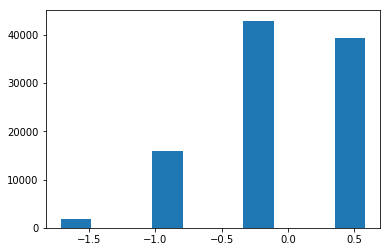

In [18]:
plt.hist(reinforce_grads)

In [19]:
# Arm gradient

In [20]:
n_samples = 10000
arm_grads = sample_gradient(phi0, p0, arm_lib.get_arm_ps_loss, n_samples = n_samples)

In [24]:
print('true_grad: ', true_grad)
print('mean arm grad: ', torch.mean(arm_grads))

true_grad:  tensor(1.00000e-02 *
       [-1.1797])
mean arm grad:  tensor(1.00000e-02 *
       -1.1962)


In [25]:
# error
torch.std(arm_grads) / np.sqrt(n_samples) * 3

tensor(1.00000e-04 *
       4.7351)

(array([  39.,  114.,  151.,   87.,   82.,  607.,  926.,  577., 3252.,
        4165.]),
 array([-0.08727336, -0.07812408, -0.06897479, -0.05982551, -0.05067622,
        -0.04152694, -0.03237766, -0.02322837, -0.01407909, -0.00492981,
         0.00421948]),
 <a list of 10 Patch objects>)

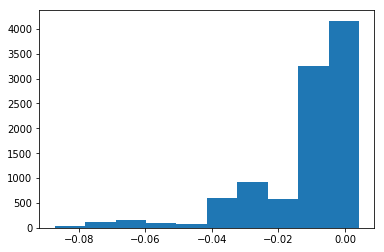

In [26]:
plt.hist(arm_grads)